## Data Preprocessing

In [1]:
import librosa
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import os
import numpy as np
from tqdm import tqdm

In [3]:
metadata = pd.read_csv('../Data/features_30_sec.csv')
metadata.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [4]:
metadata.label.value_counts()

blues        100
classical    100
country      100
disco        100
hiphop       100
jazz         100
metal        100
pop          100
reggae       100
rock         100
Name: label, dtype: int64

In [5]:
audio_file_path = "../Data/genres_original/disco/disco.00001.wav"
audio_data, sample_rate = librosa.load(audio_file_path)

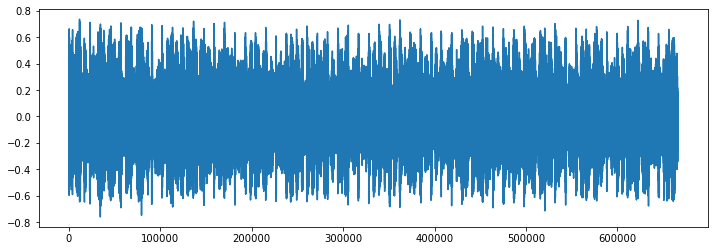

In [6]:
plt.figure(figsize=(12, 4))
plt.plot(audio_data)

## Feature Extraction

In [7]:
mfcc = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=40)
mfcc.shape

(40, 1302)

In [8]:
audio_dataset_path = "../Data/genres_original/"

In [9]:
def feature_extractor(file):
    audio, sample_rate = librosa.load(file, res_type='kaiser_fast')
    mfcc_feature = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfcc_scaled_features = np.mean(mfcc_feature.T, axis=0)
    
    return mfcc_scaled_features

In [18]:
extracted_feature = []
for index_num, row in tqdm(metadata.iterrows()):
    try:
        file_name = os.path.join(os.path.abspath(audio_dataset_path), str(row["label"])+"/", str(row["filename"]))
        final_class_label = row["label"]
        data = list(feature_extractor(file_name))
        extracted_feature.append([data, final_class_label])
    except:
        pass

552it [00:22, 22.52it/s]C:\Users\nihal\Anaconda3\envs\gpuenv\lib\site-packages\librosa\util\decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
1000it [00:41, 24.30it/s]


In [19]:
len(extracted_feature)

999

In [22]:
extracted_feature_df = pd.DataFrame(extracted_feature, columns=['features', 'class'])
extracted_feature_df.head()

,features,class
0,"[-113.59882, 121.57067, -19.162262, 42.363937,...",blues
1,"[-207.52383, 123.98514, 8.94702, 35.86715, 2.9...",blues
2,"[-90.757164, 140.44087, -29.084547, 31.686691,...",blues
3,"[-199.57513, 150.0861, 5.663404, 26.855278, 1....",blues
4,"[-160.35417, 126.209496, -35.581394, 22.139256...",blues


In [23]:
extracted_feature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   features  999 non-null    object
 1   class     999 non-null    object
dtypes: object(2)
memory usage: 15.7+ KB


In [28]:
type(extracted_feature_df['features'][0])

list

In [29]:
extracted_feature_df.to_csv("../Datasets/Extracted_Features.csv", index=False)

### Train Test Split

In [39]:
X = np.array(extracted_feature_df['features'].tolist())
y = np.array(extracted_feature_df['class'].tolist())

In [40]:
X.shape

(999, 40)

In [41]:
y = np.array(pd.get_dummies(y))

In [42]:
y.shape

(999, 10)

In [43]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)